In [1]:
# Import libraries

import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [3]:
# Function to load X values
def load_icub_right_inputs():
    X_train_icub_right = pickle.load(open('E:/training_icub_right.pkl', "rb"))
    X_valid_icub_right = pickle.load(open('E:/validation_icub_right.pkl', "rb"))
    X_test_icub_right = pickle.load(open('E:/testing_icub_right.pkl', "rb"))
    return X_train_icub_right, X_valid_icub_right, X_test_icub_right

# Function to load y values
def load_outputs():
    y_train = pickle.load(open('E:/y_training.pkl', "rb"))
    y_valid = pickle.load(open('E:/y_validation.pkl', "rb"))
    y_test = pickle.load(open('E:/y_testing.pkl', "rb"))
    return y_train, y_valid, y_test

# Function to reshape data
def reshape_input_vect(vect, size=(128, 64, 3)):
    inp_vect = []
    for i in range(vect.shape[0]):
        inp_vect.append(np.reshape(vect[i], (128, 64, 3)))
    return np.asarray(inp_vect)

# Load in X data
X_train_icub_right, X_valid_icub_right, X_test_icub_right = load_icub_right_inputs()

# Load in y data
y_train_icub_right, y_valid_icub_right, y_test_icub_right = load_outputs()

# To categorical y-values [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
y_train_icub_right = to_categorical(y_train_icub_right, num_classes = None, dtype='float32')
y_valid_icub_right = to_categorical(y_valid_icub_right, num_classes = None, dtype='float32')
y_test_icub_right = to_categorical(y_test_icub_right, num_classes = None, dtype='float32')

In [4]:
# Shuffle data
np.random.seed(200)
X_train_icub_right, X_valid_icub_right, X_test_icub_right = np.random.permutation(X_train_icub_right), np.random.permutation(
    X_valid_icub_right), np.random.permutation(X_test_icub_right)
np.random.seed(200)
y_train_icub_right, y_valid_icub_right, y_test_icub_right = np.random.permutation(y_train_icub_right), np.random.permutation(
    y_valid_icub_right), np.random.permutation(y_test_icub_right)

In [5]:
# Reshape data
X_train_icub_right, X_valid_icub_right, X_test_icub_right = reshape_input_vect(X_train_icub_right), reshape_input_vect(X_valid_icub_right), reshape_input_vect(X_test_icub_right)
print("new shape:", X_train_icub_right.shape)
print("new shape:", X_valid_icub_right.shape)
print("new shape:", X_test_icub_right.shape)

new shape: (1920, 128, 64, 3)
new shape: (640, 128, 64, 3)
new shape: (640, 128, 64, 3)


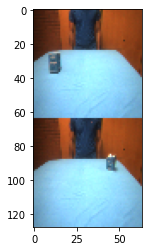

In [6]:
# Show first training image
plt.imshow(X_train_icub_right[0])
plt.show()

In [15]:
### CNN MODEL
# This model was modified in order for it to learn. The complexity of the model was reduced by removing a hidden layer and reducing the amount of nodes from 224 to 32. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(128, 64, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(480, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(224, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

optimizer_adam = Adam(learning_rate=0.001)

model.summary()

model.compile(optimizer=optimizer_adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train_icub_right, y_train_icub_right, epochs=20, verbose=1, validation_data=(X_valid_icub_right, y_valid_icub_right))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 124, 60, 32)       2432      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 62, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 62, 30, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 28, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 30, 14, 64)       

In [16]:
# Accuracy on validation set
[loss, acc] = model.evaluate(X_valid_icub_right, y_valid_icub_right, verbose=1)
print("Accuracy:" + str(acc))

20/20 [==============================] - 0s 6ms/step - loss: 0.0443 - accuracy: 0.9875
Accuracy:0.987500011920929


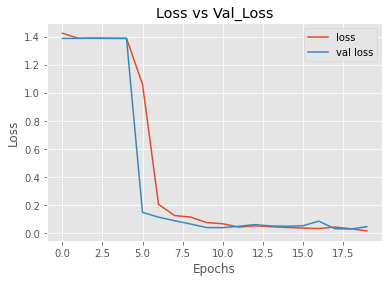

In [17]:
#Show train vs validation loss

plt.style.use('ggplot')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [18]:
# Accuracy on test set
model.evaluate(X_test_icub_right, y_test_icub_right)

20/20 [==============================] - 0s 6ms/step - loss: 0.0563 - accuracy: 0.9875


[0.05634889751672745, 0.987500011920929]

In [19]:
# Save model
model.save('CNN_2_icub_right_model',save_format='h5')

In [7]:
# Load model
model = tf.keras.models.load_model('CNN_2_icub_right_model')

In [8]:
# Accuracy on test set
model.evaluate(X_test_icub_right, y_test_icub_right)

20/20 [==============================] - 4s 6ms/step - loss: 0.0563 - accuracy: 0.9875


[0.05634889751672745, 0.987500011920929]

In [9]:
# Predict the values from the validation dataset and convert predictions classes to one hot vectors
categories = ['right to right', "Pull", "Push", "Right to right"]
y_pred = np.argmax(model.predict(X_test_icub_right), axis=-1)

# Convert validation observations to one hot vectors
y_true = np.argmax(y_test_icub_right, axis=-1)

# Print Classification report
print(classification_report(y_true, y_pred, target_names=categories, digits=4))

20/20 [==============================] - 0s 5ms/step
                precision    recall  f1-score   support

right to right     0.9874    0.9812    0.9843       160
          Pull     0.9815    0.9938    0.9876       160
          Push     0.9815    0.9938    0.9876       160
Right to right     1.0000    0.9812    0.9905       160

      accuracy                         0.9875       640
     macro avg     0.9876    0.9875    0.9875       640
  weighted avg     0.9876    0.9875    0.9875       640



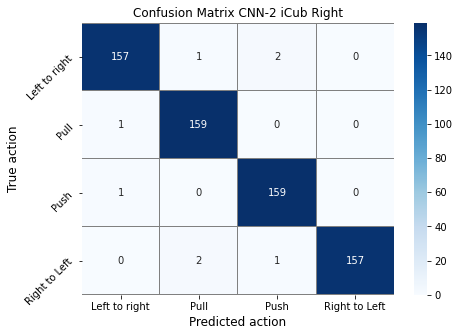

In [10]:
# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred) 
# Plot the confusion matrix
categories = ['Left to right', "Pull", "Push", "Right to Left"]
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues", linecolor="grey", fmt= 'g',ax=ax, xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted action", fontsize=12)
plt.ylabel("True action", fontsize=12)
plt.title("Confusion Matrix CNN-2 iCub Right")
locs, labels = plt.yticks()
plt.setp(labels, rotation=45)
plt.show()